In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/Bowen/Desktop/esg.csv')

In [3]:
# Drop columns that are not needed or have too many missing values
df.drop(['Ticker','Year','ESG Score','E Score','S Score','G Score','E Grade','S Grade','G Grade','Company Name','Accum Other Comp Inc - Other Adjustments','Accum Other Comp Inc - Unreal G/L Ret Int in Sec Assets','Capital Surplus/Share Premium Reserve','Comprehensive Income - Noncontrolling Interest','Comp Inc - Other Adj','Comp Inc - Minimum Pension Adj','Common Stock-Carrying Value','Common Stock Equivalents - Dollar Savings','Dilution Adjustment','Discontinued Operations','Dividends - Preferred/Preference','Common ESOP Obligation - Total','Preferred ESOP Obligation - Total','Exchange Rate Effect','Noncontrolling Interest (Balance Sheet)','Notes Payable - Short-Term Borrowings','Nonred Pfd Shares Outs (000)','Redeem Pfd Shares Outs (000)','Preferred/Preference Stock (Capital) - Total','Preferred Stock - Liquidating Value','Preferred/Preference Stock - Nonredeemable','Preferred/Preference Stock - Redeemable','Preferred Stock - Redemption Value','Treasury Stock - Total (All Capital)','Treasury Stock - Common','Treasury Stock - Number of Common Shares','Treasury Stock - Preferrred','Excess Tax Benefit of Stock Options - Cash Flow Financing','Extraordinary Items and Discontinued Operations','Extraordinary Items and Discontinued Operations (Cash Flow)','Stock Exchange Code','North America Industrial Classification System - Historical','Standard Industrial Classification - Historical','Common Shares Traded - Annual - Calendar','Dividends per Share - Pay Date - Calendar','Dividends per Share - Ex-Date - Calendar','Price Close - Annual - Calendar','Price High - Annual - Calendar','Price Low - Annual - Calendar','Cumulative Adjustment Factor by Ex-Date - Calendar','GIC Groups','GIC Industries','GIC Sectors','GIC Sub-Industries','North American Industry Classification Code'], axis=1, inplace=True)

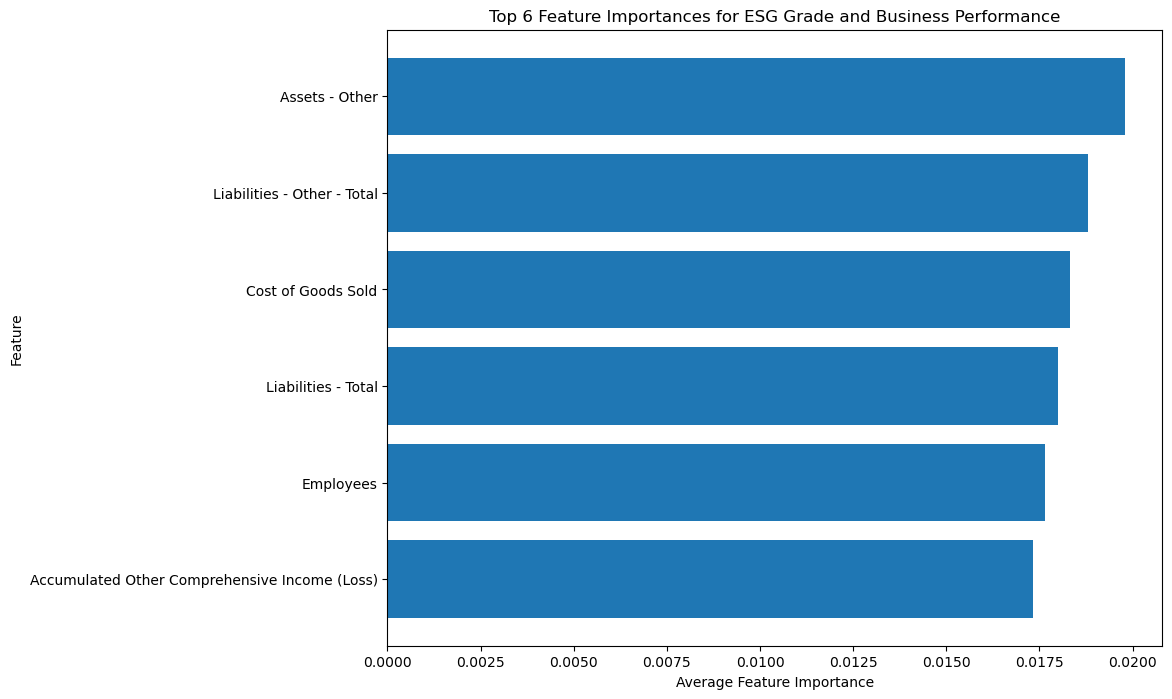

Top 6 features: ['Assets - Other', 'Liabilities - Other - Total', 'Cost of Goods Sold', 'Liabilities - Total', 'Employees', 'Accumulated Other Comprehensive Income (Loss)']


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Selecting features and target
X = df.drop('ESG Grade', axis=1)
y = df['ESG Grade']

# Placeholder for feature importances in each iteration
feature_importances_agg = pd.DataFrame(index=X.columns)

for state in range(100):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=state)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Get feature importances and store them
    feature_importances = rf_classifier.feature_importances_
    feature_importances_agg[state] = feature_importances

# Calculate the mean importance for each feature across all random states
mean_importances = feature_importances_agg.mean(axis=1)

# Sort the feature importances in descending order
sorted_indices = np.argsort(mean_importances)[::-1]
sorted_features = mean_importances.index[sorted_indices]
sorted_importances = mean_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features[:6], sorted_importances[:6], align='center') # Only top 6 features
plt.xlabel('Average Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances for ESG Grade and Business Performance')
plt.gca().invert_yaxis() # To display the most important feature at the top
plt.show()

# Print the top 6 features
print("Top 6 features:", sorted_features[:6].tolist())

In [5]:
# Decision Tree
  
# Selecting features and target 
features = ['Assets - Other'] +  ['Liabilities - Total'] + ['Cost of Goods Sold'] + ['Liabilities - Other - Total'] + ['Employees']+['Accumulated Other Comprehensive Income (Loss)']
X = df[['Assets - Other', 'Liabilities - Other - Total', 'Cost of Goods Sold', 'Liabilities - Total', 'Employees', 'Accumulated Other Comprehensive Income (Loss)']]
y = df['ESG Grade']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Controlling the Complexity
max_depth_range = range(1, 20)
train_accuracies = []
test_accuracies = []

In [6]:
for depth in max_depth_range:
    # Create a Decision Tree classifier with the current max_depth
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train, y_train)

    # Predict on the training set and calculate accuracy
    train_preds = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set and calculate accuracy
    test_preds = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_accuracies.append(test_accuracy)

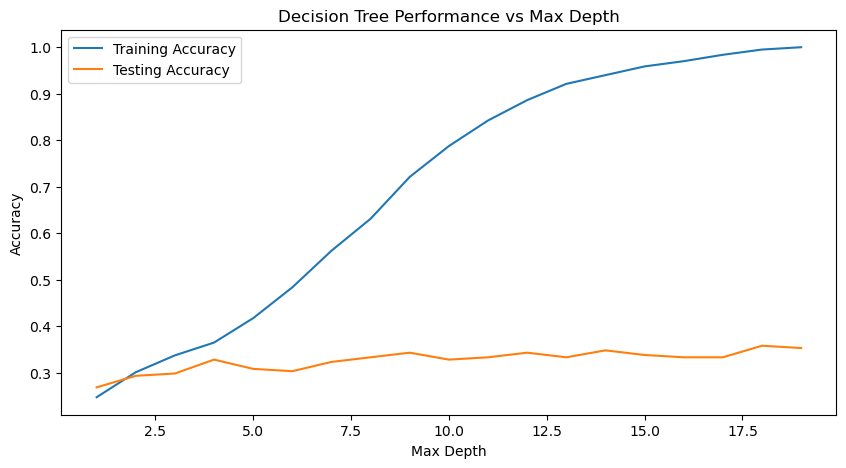

In [7]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.show()

In [8]:
# Create a Decision Tree classifier with max_depth=4
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [9]:
# Visualizing the decision tree
plt.figure(figsize=(400,50))
plot_tree(model, filled=True,feature_names=features, class_names=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-'], fontsize=15)
plt.show()

In [10]:
# Calculate Accurucy for Decision Tree
model_pred = model.fit(X_train, y_train).predict(X_test)
model_accuracy = accuracy_score(y_test, model_pred)
print(f"Decision Tree Accuracy: {model_accuracy}")

Decision Tree Accuracy: 0.32338308457711445


In [11]:
# Random Forest

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_pred = rf_classifier.fit(X_train, y_train).predict(X_test)

In [12]:
# Calculate Accurucy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.4577114427860697


In [13]:
# Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [14]:
# Load Data
df = pd.read_csv('C:/Users/Bowen/Desktop/esg.csv')

In [15]:
# Selecting features and target 
features = ['Assets - Other'] +  ['Liabilities - Total'] + ['Cost of Goods Sold'] + ['Liabilities - Other - Total'] + ['Employees']+['Accumulated Other Comprehensive Income (Loss)']
X = df[['Assets - Other', 'Liabilities - Other - Total', 'Cost of Goods Sold', 'Liabilities - Total', 'Employees', 'Accumulated Other Comprehensive Income (Loss)']]
y = df['ESG Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=50000, activation='logistic', solver='adam', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPRegressor(activation='logistic', max_iter=50000)

In [17]:
# Predict the labels of the test set
y_pred = mlp.predict(X_test)

# Calculate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 284.41


In [18]:
# Neural Networks with scaling

# Selecting features and target 
features = ['Assets - Other'] +  ['Liabilities - Total'] + ['Cost of Goods Sold'] + ['Liabilities - Other - Total'] + ['Employees']+['Accumulated Other Comprehensive Income (Loss)']
X = df[['Assets - Other', 'Liabilities - Other - Total', 'Cost of Goods Sold', 'Liabilities - Total', 'Employees', 'Accumulated Other Comprehensive Income (Loss)']]
y = df['ESG Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=50000, activation='logistic',
                   solver='adam', learning_rate_init=0.001, random_state=42)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(activation='logistic', max_iter=50000, random_state=42)

In [20]:
# Predict the labels of the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 129.96
